# Time Series Analysis for Superstore

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error

In [71]:
sales_df = pd.read_csv(r'C:\Users\saram\OneDrive\Desktop\Sales Prediction\train.csv')

In [72]:
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [73]:
#drop columns
sales_df.drop(['Row ID', 'Postal Code'], axis=1, inplace=True)

In [76]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], infer_datetime_format=True)

C:\Users\saram\AppData\Local\Temp\ipykernel_13880\221666187.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], infer_datetime_format=True)


In [77]:
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'], infer_datetime_format=True)

C:\Users\saram\AppData\Local\Temp\ipykernel_13880\764570245.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'], infer_datetime_format=True)


In [78]:
sales_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [79]:
sales_df['Order Date'].describe()

C:\Users\saram\AppData\Local\Temp\ipykernel_13880\2882367792.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales_df['Order Date'].describe()


count                    9800
unique                   1230
top       2017-05-09 00:00:00
freq                       38
first     2015-01-02 00:00:00
last      2018-12-30 00:00:00
Name: Order Date, dtype: object

In [80]:
sales_df['Ship Date'].describe()

C:\Users\saram\AppData\Local\Temp\ipykernel_13880\1233842192.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales_df['Ship Date'].describe()


count                    9800
unique                   1326
top       2018-09-26 00:00:00
freq                       34
first     2015-01-04 00:00:00
last      2019-05-01 00:00:00
Name: Ship Date, dtype: object

In [81]:
#daily ravenue
sum_sales = sales_df.groupby("Order Date").sum()
sum_sales

C:\Users\saram\AppData\Local\Temp\ipykernel_13880\2867865048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_sales = sales_df.groupby("Order Date").sum()


,Sales
Order Date,
2015-01-02,468.9000
2015-01-03,2203.1510
2015-01-04,119.8880
2015-01-06,5188.5200
2015-01-07,601.0240
...,...
2018-12-26,814.5940
2018-12-27,177.6360
2018-12-28,1657.3508


In [82]:
sum_sales.index

DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
               '2015-01-11', '2015-01-12',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1230, freq=None)

In [83]:
#reset the index
time_sales = sum_sales.copy()
time_sales.reset_index(inplace=True)

In [85]:
#resample the data ona Sales monthly
sale_monthly = time_sales.resample('M', on='Order Date').mean()
sale_monthly

,Sales
Order Date,
2015-01-31,1253.402348
2015-02-28,572.203818
2015-03-31,2077.988154
2015-04-30,988.400640
2015-05-31,1093.351481
2015-06-30,1122.359023
2015-07-31,1407.782320
2015-08-31,1556.219396
2015-09-30,2536.784608


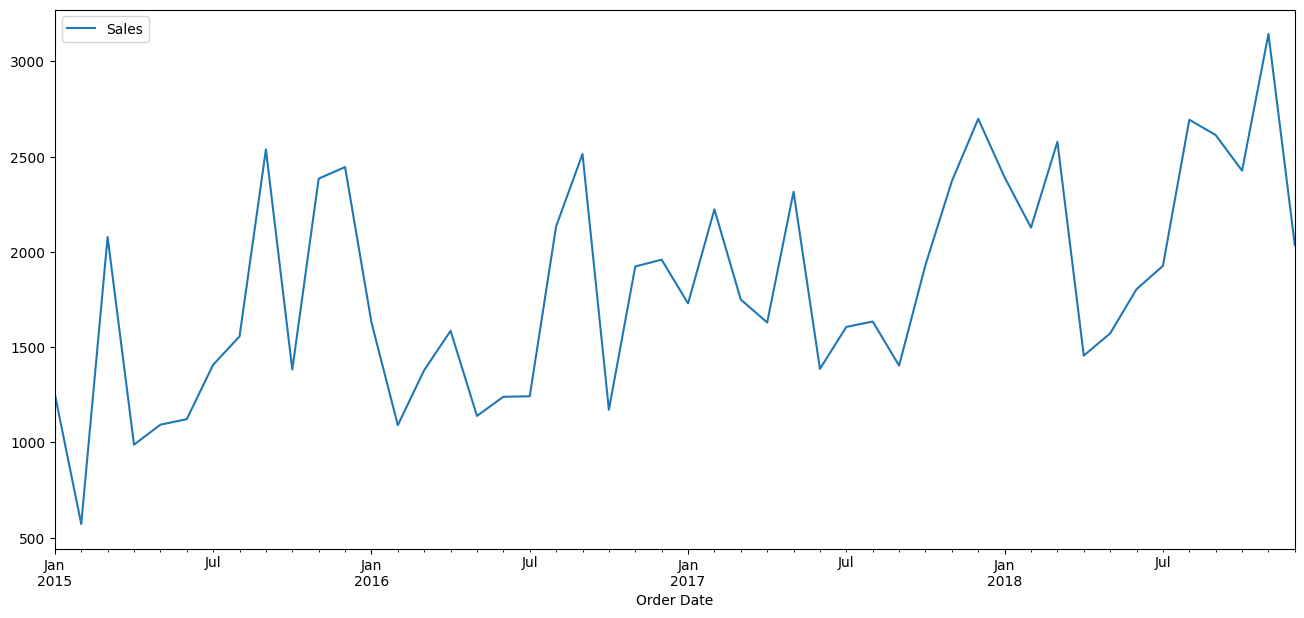

In [86]:
#plot the sales
sale_monthly.plot(figsize = (16, 7))
plt.show()

We will use time-series decompostion to decompose our time series into trend seasonaliy and noise.

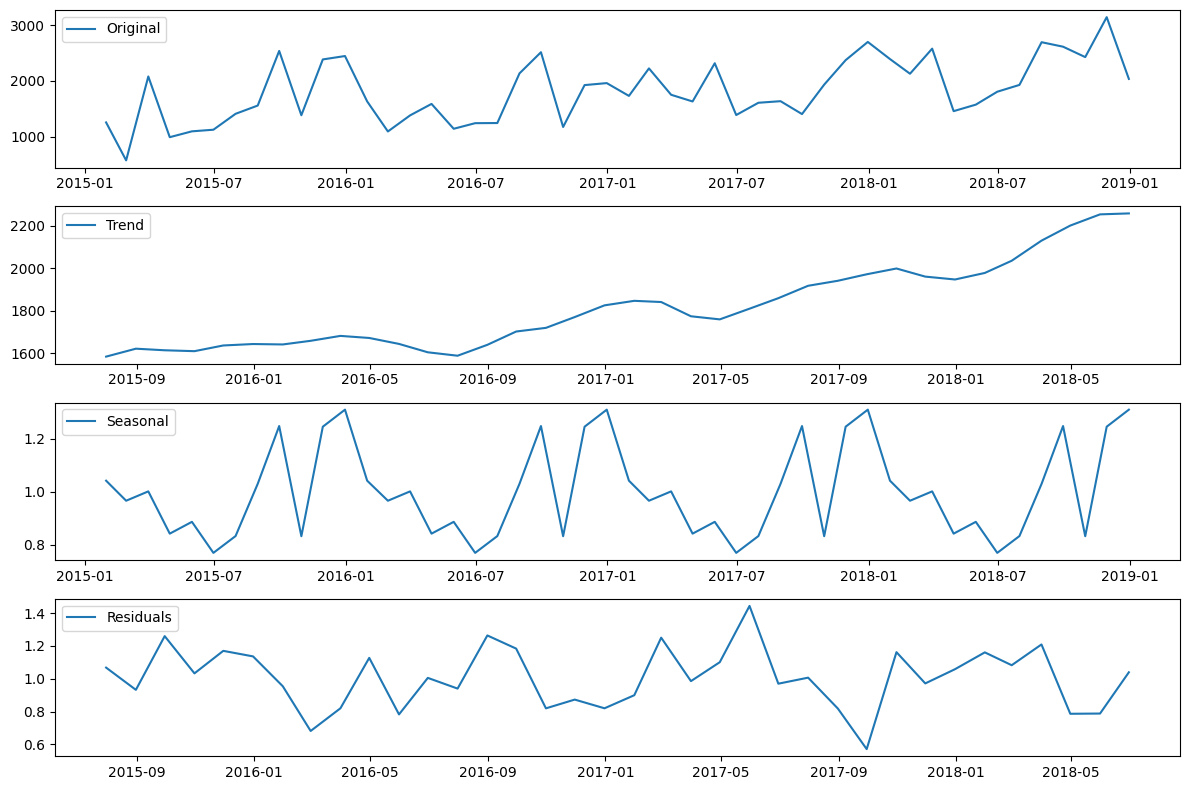

In [88]:
#seosnale decomposition
decomposition = seasonal_decompose(sale_monthly, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#plot the components with lables
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sale_monthly, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

### Split Train-Test Sets

In [89]:
#size of the train-test set
size = 0.8
#split the data set into train and test data
train, test = sale_monthly.iloc[:int(size*len(sale_monthly))], sale_monthly.iloc[int(size*len(sale_monthly)):]

We need to check if the time series is stationary or not. 
if P_value < 0.05 is stationary
else p_value > 0.05 is not stationary

In [90]:
#def function for stationary Test
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    print("ADF Test Result:")
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print(f'Critical Values: {critical_values}')
    print('\n')
    if adf_statistic < critical_values["5%"] and p_value < 0.05:
        print('The time series is likely stationary (i.e. Reject the Null Hypothesis)')
    else:
        print('The time series is likely non-stationary (i.e. Do not reject the Null Hypothesis)')

In [91]:
#check the statioarity 
test_stationarity(train['Sales'])

ADF Test Result:
ADF Statistic: -4.487202413083971
p-value: 0.00020737938781686897
Critical Values: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}


The time series is likely stationary (i.e. Reject the Null Hypothesis)


In [92]:
#identife parameters
model_param = auto_arima(train, seasonal=True, m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=593.002, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=587.005, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=586.886, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=585.554, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=679.001, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=586.661, Time=0.08 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=587.545, Time=0.10 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=587.501, Time=0.10 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=585.726, Time=0.23 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=589.483, Time=0.16 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=585.382, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=587.352, Time=0.16 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=587.100, Time=0.43 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=585.432, Time=0.15 sec
 ARIMA(0,0,0)(1,0,2)[12] intercep

### Building the SARIMA Model

In [93]:
order =(1,0,0)
seasonal_order = (0,0,1,12)

In [96]:
#train the model on the train set 
mod = sm.tsa.statespace.SARIMAX(train, order = (1,0,0),
                               seasonal_order = (0,0,1,12))

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9005      0.075     11.967      0.000       0.753       1.048
ma.S.L12       0.3983      0.305      1.305      0.192      -0.200       0.996
sigma2        3.4e+05   9.98e+04      3.407      0.001    1.44e+05    5.36e+05


C:\Users\saram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


### Prediction

In [97]:
test_stationarity(test['Sales'])

ADF Test Result:
ADF Statistic: -7.057077359650409
p-value: 5.340907609348909e-10
Critical Values: {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}


The time series is likely stationary (i.e. Reject the Null Hypothesis)


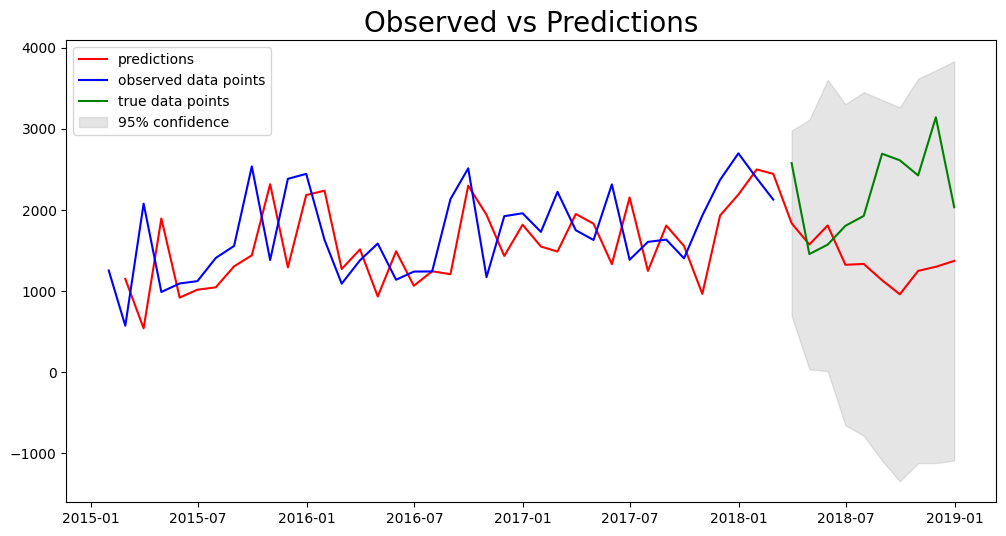

In [99]:
#make prdiction 
pred = results.get_prediction(start='2015-01-31', end='2018-12-31')
# get the confidence interval
predict_conf = pred.conf_int()
test_conf = predict_conf.loc[test.index[0]:]

#plot the results
plt.figure(figsize=(12,6))
plt.plot(pred.predicted_mean[1:],color='red',label='predictions')
plt.plot(train,color='blue',label='observed data points')
plt.plot(test,color='green',label='true data points')
plt.fill_between(test_conf.index, test_conf.iloc[:,0], test_conf.iloc[:,1], color='gray', alpha=.2, label='95% confidence')

plt.title('Observed vs Predictions',size=20)
plt.legend(loc='best')

In [108]:
#calcualte the Forecast error
forecast_error= sale_monthly['Sales'][1:]-pred.predicted_mean[1:]
mean_forecast_error = np.mean(forecast_error)
print('The Mean Squared Error of our forecasts is {}'.format(round(mean_forecast_error,2)))

#calcualte MAE
print(f"Mean Absolute Error: {mean_absolute_error(sale_monthly,pred.predicted_mean)}")

The Mean Squared Error of our forecasts is 289.9
Mean Absolute Error: 590.7397421681341


In [103]:
#train the model on the sale_monthly data set 
mod_1 = sm.tsa.statespace.SARIMAX(sale_monthly, order = (1,0,0),
                               seasonal_order = (0,0,1,12))

results_1 = mod_1.fit()
print(results_1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9202      0.054     17.101      0.000       0.815       1.026
ma.S.L12       0.2346      0.224      1.047      0.295      -0.205       0.674
sigma2      3.674e+05   9.05e+04      4.060      0.000     1.9e+05    5.45e+05


C:\Users\saram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


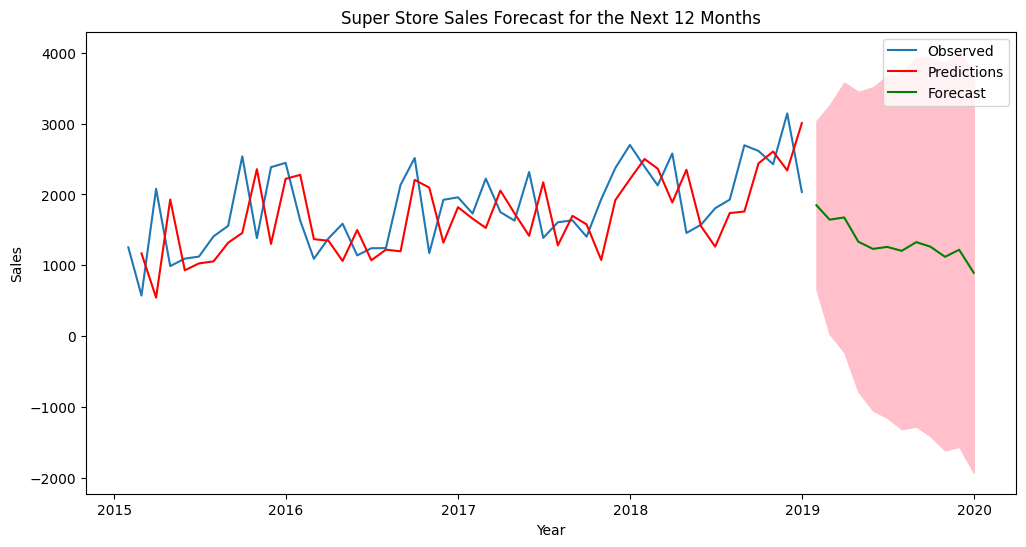

In [107]:
#make prediction
new_pred = results_1.get_prediction(start='2015-01-31', end='2018-12-31')
#Number of future periods to forecast is 12
forecast_period = 12
forecast = results_1.get_forecast(steps= forecast_period)

#plot the original dat and the forecast
plt.figure(figsize=(12, 6))
plt.plot(sale_monthly, label='Observed')
plt.plot(new_prediction.predicted_mean[1:], color='red', label='Predictions')
plt.plot(forecast.predicted_mean, color='green', label='Forecast')
plt.fill_between(forecast.conf_int().index, forecast.conf_int()['lower Sales'], forecast.conf_int()['upper Sales'], color='pink')

plt.title("Super Store Sales Forecast for the Next 12 Months")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()